# Space-variant blurring

In [1]:
# Numpy, Pillow, Imageio, math libraries were used to do the following program. 
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import cv2
import math

In [2]:
# Globe_image was opened using pillow library.
Globe_image=Image.open('Globe.png')

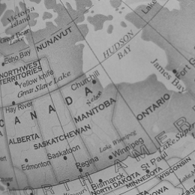

In [3]:
#This is Globe_image
Globe_image

In [4]:
#Converts image into matrix.
F_matrix=np.array(Globe_image)

In [5]:
#F_matrix
F_matrix

array([[133, 154, 160, ..., 146, 149, 152],
       [146, 164, 163, ..., 160, 157, 150],
       [148, 164, 162, ..., 156, 155, 155],
       ...,
       [151, 153, 145, ..., 146, 117, 127],
       [154, 151, 140, ..., 122, 141, 176],
       [152, 151, 149, ..., 179, 177, 169]], dtype=uint8)

In [6]:
#M,N siginifies rows and columns of the F_matrix using shape function.
M,N=F_matrix.shape

In [7]:
M,N

(195, 195)

In [8]:
#Zero matrix of M*N is created and assigned as G_matrix.
G_matrix=np.zeros((M,N))

In [9]:
#Zero matrix of M*N is created and assigned as sigma_matrix.
#This is sigma_map
Sigma_matrix=np.zeros((M,N))

In [10]:
#G_matrix
G_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Sigma-map

In [11]:
#code to find out A,B constants.
#In the sigma list first two element signifies n,m and last element signifies sigma value.
num=N/2
sigma_1=[0,0, 0.01]
sigma_2=[num,num,2.0]

In [12]:
#code to find out A,B constants.
A=sigma_2[2]/math.exp((-(sigma_2[0]-num)**2-(sigma_2[1]-num)**2)/1)
B=((sigma_1[0]-num)**2+(sigma_1[1]-num)**2)/(math.log(A/sigma_1[2]))

In [13]:
#Values of A,B constant.
A,B

(2.0, 3588.403390110064)

In [14]:
#Values of A,B constant.
A=2
B=3588.403390110064

In [15]:
#Function is defined to find the value of sigma in the sigma map.
def Sigma_fn(n,m):
    return A*math.exp((-(n-N/2)**2-(m-N/2)**2)/B)

In [16]:
#Creation of the Sigma map.
for p in range(0,N):
    for q in range(0,N):
        Sigma_matrix[p,q]=Sigma_fn(p,q)

In [17]:
#This is the Sigma_matrix
Sigma_matrix

array([[0.01      , 0.01055551, 0.01113567, ..., 0.01174118, 0.01113567,
        0.01055551],
       [0.01055551, 0.01114188, 0.01175427, ..., 0.01239341, 0.01175427,
        0.01114188],
       [0.01113567, 0.01175427, 0.01240032, ..., 0.01307459, 0.01240032,
        0.01175427],
       ...,
       [0.01174118, 0.01239341, 0.01307459, ..., 0.01378553, 0.01307459,
        0.01239341],
       [0.01113567, 0.01175427, 0.01240032, ..., 0.01307459, 0.01240032,
        0.01175427],
       [0.01055551, 0.01114188, 0.01175427, ..., 0.01239341, 0.01175427,
        0.01114188]])

In [18]:
#This is the used to find the G_matrix.intially for every (n,m) kernel matrix is found out and mapped on to the G_matrix.
itr=0
for n in range(0,N):
    for m in range(0,N):
        
        #Code to find the kernel matrix.
        sigma=Sigma_matrix[n,m]
        
        if sigma==0:
            n1=math.ceil(6*sigma+1)
            x=int((n1-1)/2)
            hmn_=np.array(1)
        else:
            n1=math.ceil(6*sigma+1)
            if n1%2==0:
                n1=n1+1
                x=int((n1-1)/2)
            else:
                n1=n1
                x=int((n1-1)/2)
            hmn=[]
            for a in range(-x,x+1):
                for b in range(-x,x+1):
                    fn=((2*math.pi*(sigma**2))**-1)*math.exp(-0.5*((a**2+b**2)/(sigma**2)))
                    hmn.append(fn)
            hmn=np.array(hmn)
            hmn=hmn.reshape(n1,n1)
            tmp=0
            for c in range(x-1):
                tmp=hmn[c,:]
                hmn[c,:]=hmn[n1-1-c,:]
                hmn[n1-1-c,:]=tmp
            hmn_=np.ravel(hmn)
            
            #normalising the h matrix(hmn)
            hmn=hmn/sum(hmn_)
            
        #multiplying the values of the the F_matrix on to the Kernel matrix.     
        hmn=hmn*F_matrix[n,m]
        
        itr += 1
        
        #mapping into G_matrix and this code finally gives us the G_matrix.
        n2=math.floor(n1/2)
        for i in range(n-n2,n+n2+1):
            for j in range(m-n2,m+n2+1):
                if i<0 or j<0 or i>=M or j>=N:
                    continue
                else:
                    G_matrix[i,j]=G_matrix[i,j]+hmn[n-n2-i,m-n2-j]

In [19]:
G_matrix

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 133., 154., ..., 151., 146., 149.],
       [  0., 146., 164., ..., 162., 160., 157.],
       ...,
       [  0., 150., 149., ...,  89., 113., 138.],
       [  0., 151., 153., ..., 166., 146., 117.],
       [  0., 154., 151., ..., 159., 122., 141.]])

In [21]:
#Converts the G_MATRIX to the Final_Image and Final_image is displayed.
Final_image = Image.fromarray(G_matrix)
Final_image.show()

In [22]:
#we are saving the image as name 'Globe_image_edited.png'.
cv2.imwrite('Globe_image_edited.png',G_matrix) 

True